<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/notebooks/02_Data_Exploration_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up WD

In [3]:
# Mount GDrive to facilitate data import
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Change working directory to project folder
%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


# Import data and set categoricals

In [6]:
# Importing the data

import pandas as pd
eppes_cleaned = pd.read_csv('./data/processed/eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)
eppes_cleaned

,q1.1,q1.2,q1.3,q1.4,q1.5,q1.6,q1.7,q1.8,q1.9,q1.10,...,d43a,d43b,d46.8,d60,d62_1,d62_2,d63,d72_1,d72_2,d77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,6.0,1.0,3.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,2.0,6.0,3.0,2.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,6.0,6.0,3.0,4.0,2.0,2.0
27462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,2.0


In [7]:
eppes_cleaned.dtypes.value_counts()

float64    311
dtype: int64

In [9]:
# Import Excel sheet containing column indeces to be dropped

columns_analysis = pd.read_excel(r'./data/interim/Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

In [10]:
# Create list of names of categorical columns 

col_names_categorical = []

for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

In [11]:
# Change datatype of categorical variables to object

eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

eppes_cleaned.dtypes.value_counts()

object     167
float64    144
dtype: int64

# Data Exploration and Visualisation

In [12]:
import seaborn as sns
from matplotlib import rcParams

## Simple count statistics

In [13]:
# voting behavior percentages
eppes_cleaned["qg1"].value_counts(normalize = True)

1.0    0.546461
2.0    0.453539
Name: qg1, dtype: float64

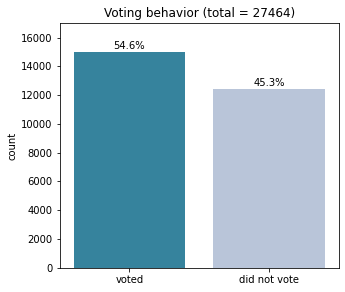

In [62]:
# voting behavior total count with percentages

rcParams['figure.figsize'] = 5,4.5

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior (total = 27464)')
countplot.set(ylim=(0, 17000))

percentage = [54.6, 45.3]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+200
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [15]:
# class affiliation percentages

eppes_cleaned["d63"].value_counts(normalize = True)

3.0    0.472692
1.0    0.264419
2.0    0.148194
4.0    0.068126
9.0    0.022284
7.0    0.009758
5.0    0.006918
8.0    0.005680
6.0    0.001930
Name: d63, dtype: float64

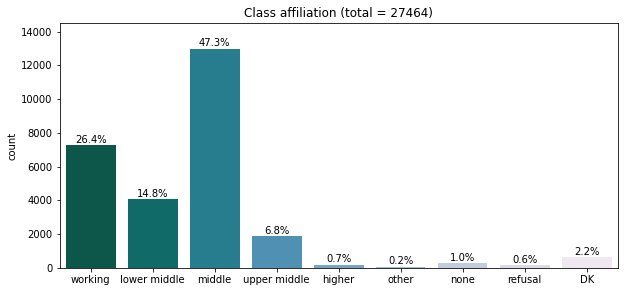

In [23]:
# class affiliation totals with percentages

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 4.5

countplot = sns.countplot(data = eppes_cleaned, x = "d63", palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["working", "lower middle", "middle", "upper middle", "higher", "other", "none", "refusal", "DK"])
countplot.set(title='Class affiliation (total = 27464)')
countplot.set(ylim=(0, 14500))

percentage = [26.4, 14.8, 47.3, 6.8, 0.7, 0.2, 1.0, 0.6, 2.2]
patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+150
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [17]:
# gender percentages (man = 1, woman = 2)

eppes_cleaned["d10"].value_counts(normalize = True)

2.0    0.54231
1.0    0.45769
Name: d10, dtype: float64

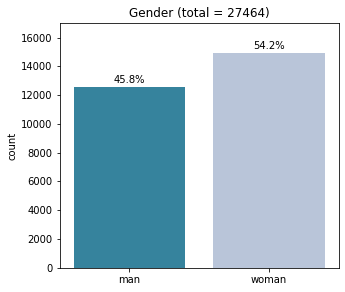

In [25]:
# gender total
rcParams['figure.figsize'] = 5, 4.5

countplot = sns.countplot(data = eppes_cleaned, x = "d10", order=[1.0, 2.0], palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["man", "woman"])
countplot.set(title='Gender (total = 27464)')
countplot.set(ylim=(0, 17000))

percentage = [45.8, 54.2]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+300
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

## Voting Behavior distributions

### Age

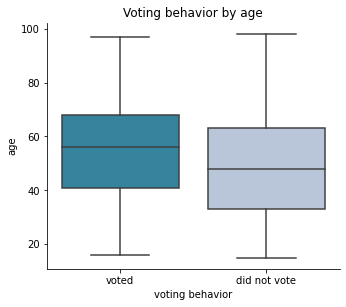

In [32]:
# voting behavior and age

catplot = sns.catplot(data=eppes_cleaned, x="qg1", y="d11", kind="box", palette='PuBuGn_r')
catplot.set(xlabel='voting behavior', ylabel='age')
catplot.set(xticklabels=["voted", "did not vote"])
catplot.set(title='Voting behavior by age')

catplot.fig.set_size_inches(4.9 ,4)

### Gender

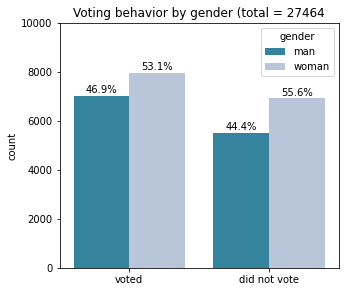

In [61]:
# voting behavior by gender total

rcParams['figure.figsize'] = 5, 4.5

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", hue = "d10", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior by gender (total = 27464)')
countplot.set(ylim=(0, 10000))

countplot.legend(title='gender', loc='upper right', labels=['man', 'woman'])

percentage = [46.9, 44.4, 53.1, 55.6]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [35]:
vote_by_gender = eppes_cleaned["d10"].groupby(eppes_cleaned["qg1"]).value_counts(normalize=True).rename('percent').reset_index()
vote_by_gender["percent"] = vote_by_gender["percent"].mul(100)

vote_by_gender.loc[(vote_by_gender['d10'] == 1), 'd10'] = 'man'
vote_by_gender.loc[(vote_by_gender['d10'] == 2), 'd10'] = 'woman'
vote_by_gender = vote_by_gender.sort_values(by=['qg1', 'd10'], ascending = True)
print(vote_by_gender)

   qg1    d10    percent
1  1.0    man  46.914979
0  1.0  woman  53.085021
3  2.0    man  44.388247
2  2.0  woman  55.611753


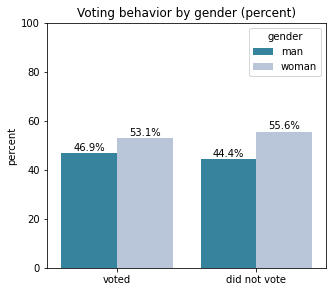

In [36]:
# voting behavior by gender percent

rcParams['figure.figsize'] = 5, 4.5

barplot = sns.barplot(data = vote_by_gender, x = "qg1", y = "percent", hue = "d10", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["voted", "did not vote"])
barplot.set(title='Voting behavior by gender (%)')
barplot.set(ylim=(0, 100))

barplot.legend(title='gender')

percentage = [46.9, 44.4, 53.1, 55.6]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [37]:
# Voting frequency by gender

gender_voted = eppes_cleaned["qg1"].groupby(eppes_cleaned["d10"]).value_counts(normalize=True).rename('percent').reset_index()
gender_voted["percent"] = gender_voted["percent"].mul(100)

gender_voted = gender_voted.sort_values(by=['qg1'], ascending = True).iloc[0:2,0:3]

print(gender_voted)

   d10  qg1    percent
0  1.0  1.0  56.014320
2  2.0  1.0  53.491339


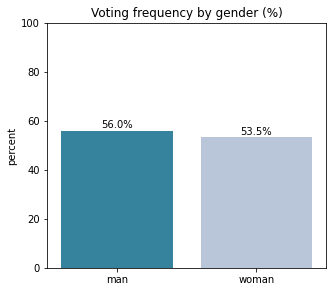

In [63]:
# Voting frequency by gender (percent) full scale

rcParams['figure.figsize'] = 5,4.5

barplot = sns.barplot(data = gender_voted, x = "d10", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["man", "woman"])
barplot.set(title='Voting frequency by gender (%)')
barplot.set(ylim=(0, 100))

percentage = [56.0, 53.5]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

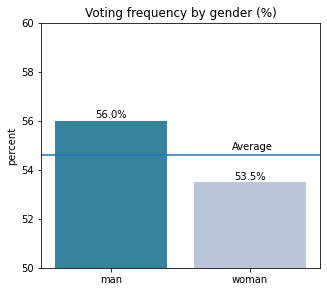

In [60]:
# Voting frequency by gender (percent) scaled and with average line

rcParams['figure.figsize'] = 5,4.5

barplot = sns.barplot(data = gender_voted, x = "d10", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["man", "woman"])
barplot.set(title='Voting frequency by gender (%)')
barplot.set(ylim=(50, 60))
barplot.axhline(54.6)
barplot.text(0.87, 54.8, "Average", horizontalalignment='left', size='medium', color='black', weight='normal')

percentage = [56.0, 53.5]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+0.1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

### Class affiliation

In [65]:
# Voting frequency by class

class_voted = eppes_cleaned["qg1"].groupby(eppes_cleaned["d63"]).value_counts(normalize=True).rename('percent').reset_index()
class_voted["percent"] = class_voted["percent"].mul(100)

class_voted = class_voted.sort_values(by=['qg1', 'd63'], ascending = True).iloc[0:9,0:3]

print(class_voted)

    d63  qg1    percent
1   1.0  1.0  45.593500
2   2.0  1.0  51.326781
4   3.0  1.0  59.651826
6   4.0  1.0  72.100481
8   5.0  1.0  68.947368
11  6.0  1.0  43.396226
13  7.0  1.0  38.059701
15  8.0  1.0  26.923077
17  9.0  1.0  35.457516


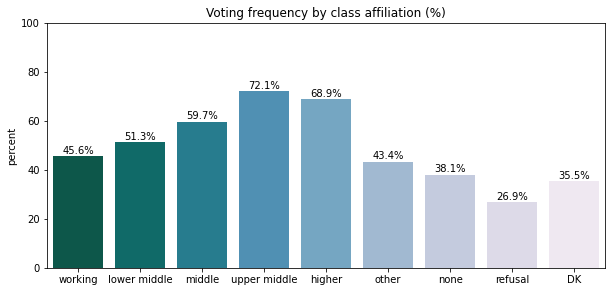

In [67]:
# voting frequency by class affiliation

rcParams['figure.figsize'] = 10,4.5

barplot = sns.barplot(data = class_voted, x = "d63", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='', ylabel='percent')
barplot.set(xticklabels=["working", "lower middle", "middle", "upper middle", "higher", "other", "none", "refusal", "DK"])
barplot.set(title='Voting frequency by class affiliation (%)')
barplot.set(ylim=(0, 100))

percentage = [45.6, 51.3, 59.7, 72.1, 68.9, 43.4, 38.1, 26.9, 35.5]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

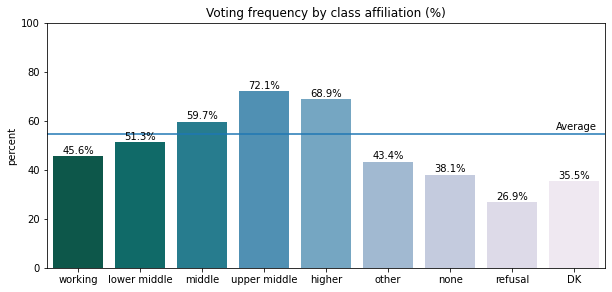

In [77]:
# voting frequency by class affiliation with average line

rcParams['figure.figsize'] = 10,4.5

barplot = sns.barplot(data = class_voted, x = "d63", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='', ylabel='percent')
barplot.set(xticklabels=["working", "lower middle", "middle", "upper middle", "higher", "other", "none", "refusal", "DK"])
barplot.set(title='Voting frequency by class affiliation (%)')
barplot.set(ylim=(0, 100))
barplot.axhline(54.6)
barplot.text(7.7, 56.5, "Average", horizontalalignment='left', size='medium', color='black', weight='normal')

percentage = [45.6, 51.3, 59.7, 72.1, 68.9, 43.4, 38.1, 26.9, 35.5]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

### EU Discussion

In [78]:
vote_by_eudisc = eppes_cleaned["d71a_2"].groupby(eppes_cleaned["qg1"]).value_counts(normalize=True).rename('percent').reset_index()
vote_by_eudisc["percent"] = vote_by_eudisc["percent"].mul(100)

vote_by_eudisc = vote_by_eudisc.sort_values(by=['qg1', 'd71a_2'], ascending = True)

vote_by_eudisc.loc[(vote_by_eudisc['d71a_2'] == 1), 'd71a_2'] = 'frequently'
vote_by_eudisc.loc[(vote_by_eudisc['d71a_2'] == 2), 'd71a_2'] = 'occasionally'
vote_by_eudisc.loc[(vote_by_eudisc['d71a_2'] == 3), 'd71a_2'] = 'never'
vote_by_eudisc.loc[(vote_by_eudisc['d71a_2'] == 4), 'd71a_2'] = 'DK'

print(vote_by_eudisc)

   qg1        d71a_2    percent
2  1.0    frequently  19.376333
0  1.0  occasionally  59.061834
1  1.0         never  21.175373
3  1.0            DK   0.386461
6  2.0    frequently   9.144188
4  2.0  occasionally  49.108863
5  2.0         never  40.976236
7  2.0            DK   0.770713


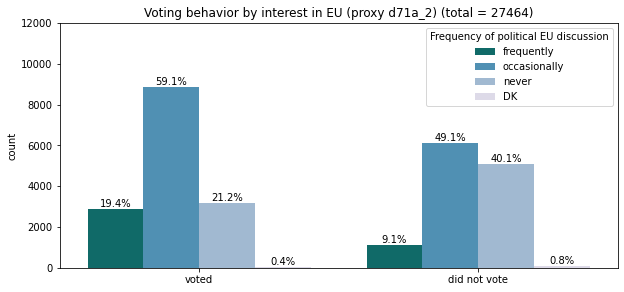

In [80]:
# voting behavior: "When you get together with friends or relatives, would you say you discuss frequently, occasionally or never about European political matters?""

rcParams['figure.figsize'] = 10,4.5

countplot = sns.countplot(data = eppes_cleaned, x = "qg1", hue = "d71a_2", order=eppes_cleaned["qg1"].value_counts(ascending=False).index, palette='PuBuGn_r')
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior by interest in EU (proxy d71a_2) (total = 27464)')
countplot.set(ylim=(0, 12000))

countplot.legend(title='Frequency of political EU discussion', loc='upper right', labels=['frequently', 'occasionally', 'never', 'DK'])

percentage = [19.4, 9.1, 59.1, 49.1, 21.2, 40.1, 0.4, 0.8]

patches = countplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+100
   countplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

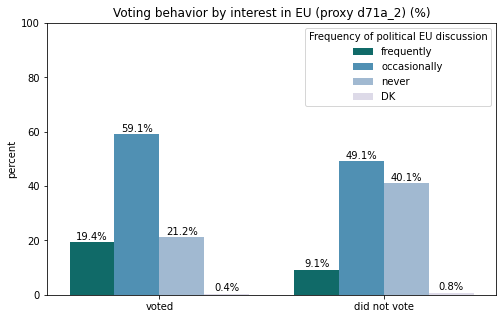

In [81]:
# voting behavior EU discussion pecentages

rcParams['figure.figsize'] = 8.05,5

barplot = sns.barplot(data = vote_by_eudisc, x = "qg1", y = "percent", hue = "d71a_2", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["voted", "did not vote"])
barplot.set(title='Voting behavior by interest in EU (proxy d71a_2) (%)')
barplot.set(ylim=(0, 100))


barplot.legend(title='Frequency of political EU discussion')

percentage = [19.4, 9.1, 59.1, 49.1, 21.2, 40.1, 0.4, 0.8]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

In [82]:
# Voting frequency by interest

eu_disc_voted = eppes_cleaned["qg1"].groupby(eppes_cleaned["d71a_2"]).value_counts(normalize=True).rename('percent').reset_index()
eu_disc_voted["percent"] = eu_disc_voted["percent"].mul(100)

eu_disc_voted = eu_disc_voted.sort_values(by=['qg1'], ascending = True).iloc[0:4,0:3]

print(eu_disc_voted)

   d71a_2  qg1    percent
0     1.0  1.0  71.855696
2     2.0  1.0  59.168280
5     3.0  1.0  38.372374
7     4.0  1.0  37.662338


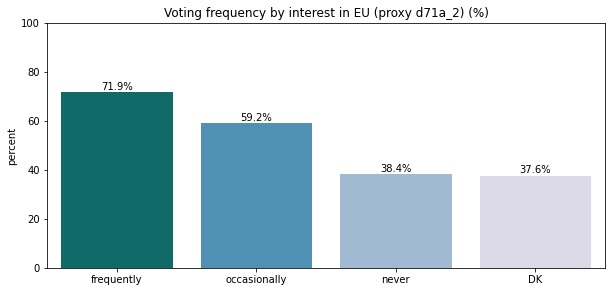

In [84]:
# Voting frequency by interest in EU 

rcParams['figure.figsize'] = 10,4.5

barplot = sns.barplot(data = eu_disc_voted, x = "d71a_2", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["frequently", "occasionally", "never", "DK"])
barplot.set(title='Voting frequency by interest in EU (proxy d71a_2) (%)')
barplot.set(ylim=(0, 100))

percentage = [71.9, 59.2, 38.4, 37.6]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

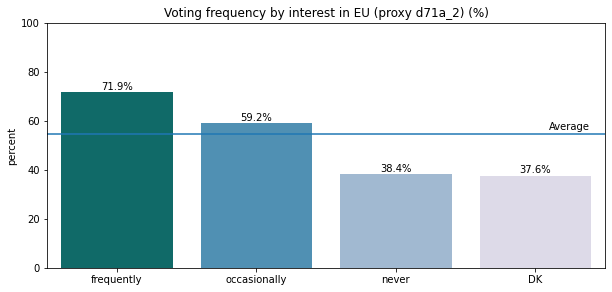

In [88]:
# Voting frequency by interest in EU with average line

rcParams['figure.figsize'] = 10,4.5

barplot = sns.barplot(data = eu_disc_voted, x = "d71a_2", y = "percent", palette='PuBuGn_r')
barplot.set(xlabel='')
barplot.set(xticklabels=["frequently", "occasionally", "never", "DK"])
barplot.set(title='Voting frequency by interest in EU (proxy d71a_2) (%)')
barplot.set(ylim=(0, 100))
barplot.axhline(54.6)
barplot.text(3.1, 56.5, "Average", horizontalalignment='left', size='medium', color='black', weight='normal')

percentage = [71.9, 59.2, 38.4, 37.6]

patches = barplot.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+1
   barplot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

## f1/mcc

In [91]:
# set seed
import numpy as np

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

rs = RandomState(MT19937(SeedSequence(3612934)))

In [92]:
# create dummy dataframe
np.random.seed(0) ; 
f1 = np.random.normal(0.8, 0.07, 40)
mcc = np.random.normal(0.8, 0.07, 40)

m= np.array([['a', 'b', 'c', 'd']])
model = np.repeat(m, 10)

model_data = pd.DataFrame({'model': model, 'f1': f1, 'mcc': mcc})


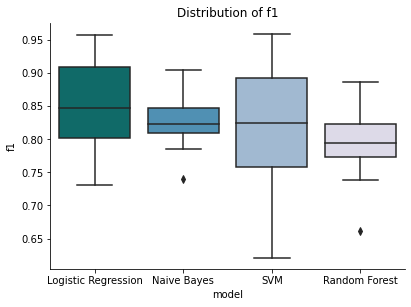

In [99]:
# f1 boxplot per model

catplot = sns.catplot(data=model_data, x="model", y="f1", kind="box", palette='PuBuGn_r')
catplot.set(xticklabels=["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"])
catplot.set(title='Distribution of f1')
catplot.fig.set_size_inches(6,4)

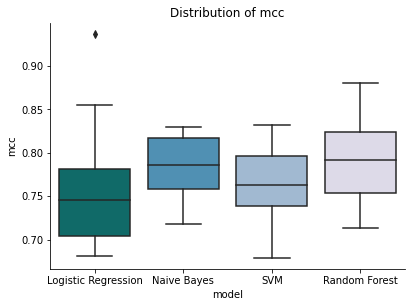

In [100]:
# mcc boxplot per model

catplot = sns.catplot(data=model_data, x="model", y="mcc", kind="box", palette='PuBuGn_r')
catplot.set(xticklabels=["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"])
catplot.set(title='Distribution of mcc')
catplot.fig.set_size_inches(6,4)